### Continuing work on UFC Data

The below is an aggregation of work from previous notebooks

In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

pd.options.display.max_columns = 999

dat_df = pd.read_csv("../data/ufc/data.csv")
prep_dat_df = pd.read_csv("../data/ufc/preprocessed_data.csv")
raw_fighters_df = pd.read_csv("../data/ufc/raw_fighter_details.csv")
raw_dat_df = pd.read_csv("../data/ufc/raw_total_fight_data.csv", sep=";")

dat_df.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,2.600000,2.000000,48.600000,11.200000,0.800000,7.6,5.400000,0.400000,0.000000,65.40,22.600000,0.466000,0.400000,0.80000,0.200000,0.100000,66.400000,23.600000,4.0,1.0,6.400000,4.000000,1.000000,0.60000,51.200000,17.400000,0.600000,0.200000,39.600000,9.400000,0.200000,6.80000,4.800000,0.000000,0.000000,52.800000,18.20000,0.236000,0.000000,1.000000,0.400000,0.100000,53.800000,19.200000,9.0,419.400000,0.0,0.0,1.0,0.0,2.0,1.0,0.0,4.0,Orthodox,167.64,170.18,135.0,0.0,4.0,0.0,21.900000,16.400000,17.000000,11.000000,75.000000,26.500000,9.400000,6.500000,74.200000,23.90,0.400,5.300000,3.700000,1.200000,0.000000,101.400000,44.000000,0.466000,0.100000,5.300000,1.900000,0.458000,129.900000,69.100000,4.0,2.0,13.300000,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,0.100000,9.400000,6.100000,0.000000,0.000000,98.800000,32.200000,0.336000,0.000000,0.900000,0.100000,0.050000,110.500000,43.300000,27.0,742.60,3.0,0.0,2.0,4.0,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,3.0,0.0,14.600000,9.100000,11.800000,7.300000,124.700000,42.100000,2.400000,1.900000,112.000000,32.000000,0.000000,

In [9]:
# I'd like to have one row per fighter per fight. That is, 2 rows per fight, with a simple "is_winner" column.

r_fighter_cols = [col for col in dat_df.columns if col.startswith("R_")]
b_fighter_cols = [col for col in dat_df.columns if col.startswith("B_")]

other_cols = [col for col in dat_df.columns if col not in r_fighter_cols and col not in b_fighter_cols]

In [10]:
import re

def extractFighters(dat_df, fighter_cols, opp_cols, fighter_prefix, opp_prefix, fighter_color):

    fighters_df = dat_df[fighter_cols + other_cols].copy()
    fighters_df.columns = [col.replace(fighter_prefix, "") for col in fighters_df.columns]
    fighters_df["is_winner"] = fighters_df["Winner"] == fighter_color

    opp_df = dat_df[opp_cols].copy()
    opp_df.columns = [re.sub(r"^" + opp_prefix, "opponent_", col) for col in opp_df.columns]

    fighters_df = pd.concat([fighters_df, opp_df], axis=1)
    
    return fighters_df

r_fighters_df = extractFighters(dat_df, r_fighter_cols, b_fighter_cols, "R_", "B_", "Red")
b_fighters_df = extractFighters(dat_df, b_fighter_cols, r_fighter_cols, "B_", "R_", "Blue")

fighters_df = pd.concat([r_fighters_df, b_fighters_df], axis=0)
fighters_df.head()

,Height_cms,Reach_cms,Referee,Stance,Weight_lbs,Winner,age,avg_BODY_att,avg_BODY_landed,avg_CLINCH_att,avg_CLINCH_landed,avg_DISTANCE_att,avg_DISTANCE_landed,avg_GROUND_att,avg_GROUND_landed,avg_HEAD_att,avg_HEAD_landed,avg_KD,avg_LEG_att,avg_LEG_landed,avg_PASS,avg_REV,avg_SIG_STR_att,avg_SIG_STR_landed,avg_SIG_STR_pct,avg_SIG_STatt,avg_SIG_STlanded,avg_SIG_STpct,avg_SUATT,avg_SUB_ATT,avg_TD_att,avg_TD_landed,avg_TD_pct,avg_TOTAL_STR_att,avg_TOTAL_STR_landed,avg_TOTAL_STatt,avg_TOTAL_STlanded,avg_opp_BODY_att,avg_opp_BODY_landed,avg_opp_CLINCH_att,avg_opp_CLINCH_landed,avg_opp_DISTANCE_att,avg_opp_DISTANCE_landed,avg_opp_GROUND_att,avg_opp_GROUND_landed,avg_opp_HEAD_att,avg_opp_HEAD_landed,avg_opp_KD,avg_opp_LEG_att,avg_opp_LEG_landed,avg_opp_PASS,avg_opp_REV,avg_opp_SIG_STR_att,avg_opp_SIG_STR_landed,avg_opp_SIG_STR_pct,avg_opp_SIG_STatt,avg_opp_SIG_STlanded,avg_opp_SIG_STpct,avg_opp_SUATT,avg_opp_SUB_ATT,avg_opp_TD_att,avg_opp_TD_landed,avg_opp_TD_pct,avg_opp_TOTAL_STR_att,avg_opp_TOTAL_STR_landed,avg_opp_TOTAL_STatt,avg_opp_TOTAL_STlanded,current_lose_streak,current_win_streak,date,draw,fighter,is_winner,location,longest_win_streak,losses,no_of_rounds,opponent_Height_cms,opponent_Reach_cms,opponent_Stance,opponent_Weight_lbs,opponent_age,opponent_avg_BODY_att,opponent_avg_BODY_landed,opponent_avg_CLINCH_att,opponent_avg_CLINCH_landed,opponent_avg_DISTANCE_att,opponent_avg_DISTANCE_landed,opponent_avg_GROUND_att,opponent_avg_GROUND_landed,opponent_avg_HEAD_att,opponent_avg_HEAD_landed,opponent_avg_KD,opponent_avg_LEG_att,opponent_avg_LEG_landed,opponent_avg_PASS,opponent_avg_REV,opponent_avg_SIG_STR_att,opponent_avg_SIG_STR_landed,opponent_avg_SIG_STR_pct,opponent_avg_SUB_ATT,opponent_avg_TD_att,opponent_avg_TD_landed,opponent_avg_TD_pct,opponent_avg_TOTAL_STR_att,opponent_avg_TOTAL_STR_landed,opponent_avg_opp_BODY_att,opponent_avg_opp_BODY_landed,opponent_avg_opp_CLINCH_att,opponent_avg_opp_CLINCH_landed,opponent_avg_opp_DISTANCE_att,opponent_avg_opp_DISTANCE_landed,opponent_avg_opp_GROUND_att,opponent_avg_opp_GROUND_landed,opponent_avg_opp_HEAD_att,opponent_avg_opp_HEAD_landed,opponent_avg_opp_KD,opponent_avg_opp_LEG_att,opponent_avg_opp_LEG_landed,opponent_avg_opp_PASS,opponent_avg_opp_REV,opponent_avg_opp_SIG_STR_att,opponent_avg_opp_SIG_STR_landed,opponent_avg_opp_SIG_STR_pct,opponent_avg_opp_SUB_ATT,opponent_avg_opp_TD_att,opponent_avg_opp_TD_landed,opponent_avg_opp_TD_pct,opponent_avg_opp_TOTAL_STR_att,opponent_avg_opp_TOTAL_STR_landed,opponent_current_lose_streak,opponent_current_win_streak,opponent_draw,opponent_fighter,opponent_longest_win_streak,opponent_losses,opponent_total_rounds_fought,opponent_total_time_fought(seconds),opponent_total_title_bouts,opponent_win_by_Decision_Majority,opponent_win_by_Decision_Split,opponent_win_by_Decision_Unanimous,opponent_win_by_KO/TKO,opponent_win_by_Submission,opponent_win_by_TKO_Doctor_Stoppage,opponent_wins,title_bout,total_rounds_fought,total_time_fought(seconds),total_title_bouts,weight_class,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,wins
0,162.56,162.56,Marc Goddard,Orthodox,135.0,Red,32.0,21.900000,16.400000,17.000000,11.000000,75.000000,26.500000,9.400000,6.500000,74.200000,23.90,0.400,5.300000,3.700000,1.200000,0.000000,NaN,NaN,NaN,101.400000,44.000000,0.466000,NaN,0.100000,5.300000,1.900000,0.458000,NaN,NaN,129.900000,69.100000,13.300000,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,0.100000,9.400000,6.100000,0.000000,0.000000,NaN,NaN,NaN,98.800000,32.200000,0.336000,NaN,0.000000,0.900000,0.100000,0.050000,NaN,NaN,110.500000,43.300000,0.0,4.0,2019-06-08,0.0,Henry Cejudo,True,"Chicago, Illinois, USA",4.0,2.0,5,167.64,170.18,Orthodox,135.0,31.0,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,2.600000,2.000000,48.600000,11.200000,0.800000,7.6,5.400000,0.400000,0.000000,65.40,22.600000,0.466000,0.400000,0.80000,0.200000,0.100000,66.400

In [11]:
for col in [col for col in fighters_df.select_dtypes(include="number").columns if col.startswith("opponent_")]:
    
    col2 = col
    col1 = col[9:]
    
    fighters_df[col1 + "_ratio"] = (fighters_df[col1] + 1) / (fighters_df[col2] + 1)

In [12]:
# prevent leakage
fighters_df = fighters_df.drop(columns="Winner")

In [13]:
# change prefixes to suffixes
fighters_df.columns = [col[9:] + "_opponent" if col.startswith("opponent_") else col for col in fighters_df.columns]

NameError: name 'feature_importances_std_' is not defined

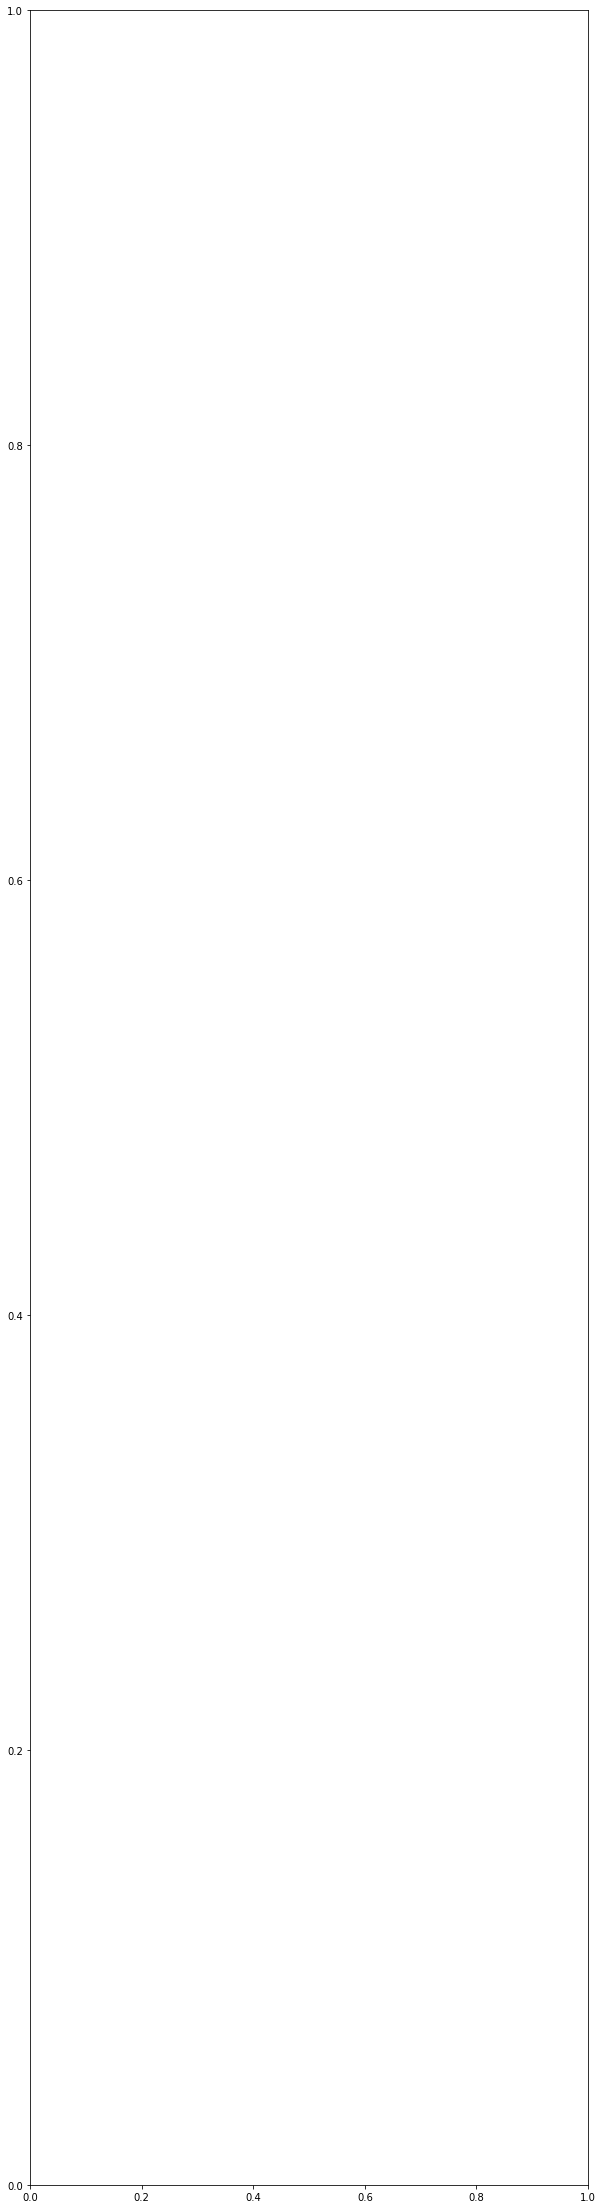

In [35]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import eli5
from eli5.sklearn import PermutationImportance

from matplotlib import pyplot as plt


target = "is_winner"
features = fighters_df.columns.drop([target] + ["age", "Referee"])


transformer = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy="constant", fill_value=0),
    StandardScaler(),
)

train, test = train_test_split(fighters_df)

X_train = transformer.fit_transform(train[features])
y_train = train[target]

X_test = transformer.transform(test[features])
y_test = test[target]

model = RandomForestClassifier(n_jobs=-1, n_estimators=120)
model.fit(X_train, y_train)

permuter = PermutationImportance(
    model,
    scoring="accuracy",
    n_iter=10,
)

permuter.fit(X_test, y_test)


/home/cowley/venv/lambda/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


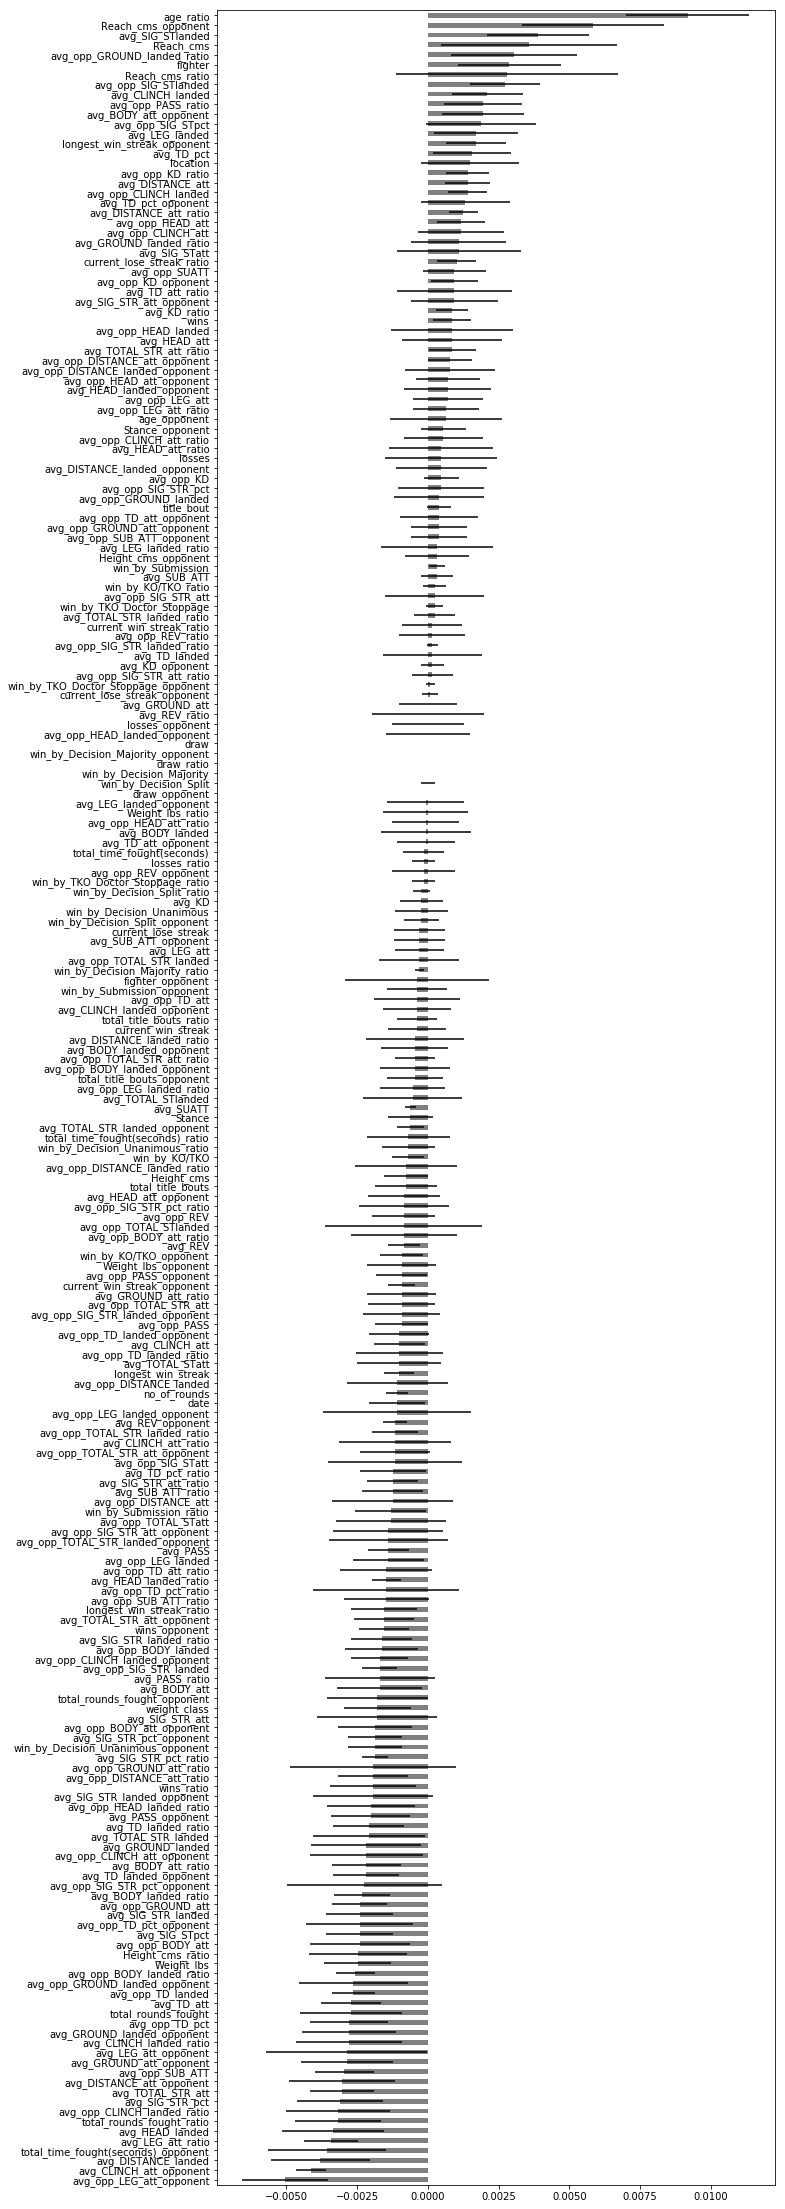

In [37]:
fig, ax = plt.subplots(figsize=(10, 40))

feature_importances = pd.Series(permuter.feature_importances_, features).sort_values()
feature_importances_std = pd.Series(permuter.feature_importances_std_, features).sort_values()
feature_importances.plot.barh(color="gray", xerr=feature_importances_std, ax=ax)

fig.show()

In [38]:
feature_importances_plus_error = pd.Series(permuter.feature_importances_ + permuter.feature_importances_std_, fighters_df.columns.drop([target] + ["age", "Referee"]))

In [39]:
features = fighters_df.columns.drop([target] + ["age", "Referee", "location"] + list(feature_importances_plus_error[feature_importances_plus_error <= 0].index))

In [40]:
pipeline = make_pipeline(
    ce.OneHotEncoder(),
    SimpleImputer(strategy="constant", fill_value=0),
    StandardScaler(),
    RandomForestRegressor(n_jobs=-1, n_estimators=120),
)

train, test = train_test_split(fighters_df)

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['Stance', 'fighter', 'Stance_opponent',
                                     'fighter_opponent'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=False, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=0,
                               missing_values=nan, strategy='constant',
                               v...
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                               

In [41]:

import re

prefix_re = re.compile(r".*(_opponent)|(_ratio)$")

fighters_individual_df = fighters_df[[col for col in fighters_df.columns.drop(["is_winner"]) if not prefix_re.match(col)]]
latest_fights = fighters_individual_df.sort_values(by="date").groupby("fighter").tail(1)

def getByFighter(fighter_name):
    return latest_fights[latest_fights["fighter"] == fighter_name].copy()

def makeBoutDf(fighter1, fighter2):
    
    fighter1_df = getByFighter(fighter1)
    fighter2_df = getByFighter(fighter2)
    
    fighter1_df["temp_id_"] = fighter2_df["temp_id_"] = np.random.randint(2**31)
    fighter1_df, fighter2_df = (
        pd.merge(fighter1_df, fighter2_df, on="temp_id_", suffixes=("", "_opponent")),
        pd.merge(fighter2_df, fighter1_df, on="temp_id_", suffixes=("", "_opponent")),
    )
    
    fight_df = pd.concat([fighter1_df, fighter2_df])
    
    for col in [col for col in fight_df.select_dtypes(include="number").columns if col.endswith("_opponent")]:

        col2 = col
        col1 = col[:-9]

        fight_df[col1 + "_ratio"] = (fight_df[col1] + 1) / (fight_df[col2] + 1)
    
    fight_df["stance_config"] = fight_df["Stance"] + "-" + fight_df["Stance_opponent"]
    
    return fight_df.drop(columns=["temp_id_", "Referee_opponent"])

def scoreBout(bout):
    y_pred = pipeline.predict(bout[features])
    return (y_pred[0] + (1 - y_pred[1]))/2

def doPrediction(red_fighter, blue_fighter):
    bout = makeBoutDf(red_fighter, blue_fighter)
    score = scoreBout(bout)
    
    if round(score) >= 1:
        winner = red_fighter
    else:
        winner = blue_fighter
        score = 1 - score
        
    return score, winner


In [42]:
doPrediction("Kamaru Usman", "Colby Covington")

(0.5041666666666667, 'Kamaru Usman')

In [43]:
doPrediction("Jorge Masvidal", "Nate Diaz")

(0.5291666666666666, 'Jorge Masvidal')

In [44]:
doPrediction("Conor McGregor", "Khabib Nurmagomedov")

(0.6875, 'Khabib Nurmagomedov')

In [45]:
doPrediction("Robert Whittaker", "Israel Adesanya")

(0.5, 'Israel Adesanya')

In [46]:
doPrediction("Max Holloway", "Frankie Edgar")

(0.5375, 'Max Holloway')

In [47]:
doPrediction("Michelle Waterson", "Joanna Jedrzejczyk")

(0.5666666666666667, 'Joanna Jedrzejczyk')

In [48]:
doPrediction("Amanda Nunes", "Germaine de Randamie")

(0.6083333333333334, 'Amanda Nunes')

In [49]:
doPrediction("Jon Jones", "Anthony Smith")

(0.7333333333333334, 'Jon Jones')

In [50]:
doPrediction("Khabib Nurmagomedov", "Dustin Poirier")

(0.65, 'Khabib Nurmagomedov')

In [51]:
doPrediction("Ben Askren", "Robbie Lawler")

(0.525, 'Ben Askren')

In [52]:
doPrediction("Ben Askren", "Jorge Masvidal")

(0.5708333333333333, 'Ben Askren')

In [56]:
import pickle

with open("pipeline.pickle", "wb") as f:
    pickle.dump(pipeline, f)

with open("features.pickle", "wb") as f:
    pickle.dump(features, f)